size of the image:  (256, 256)  colour mode: RGB
size of the image:  (256, 256)  colour mode: RGB


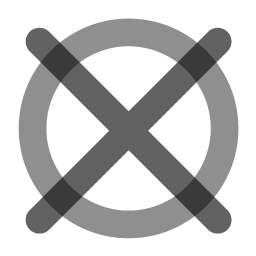

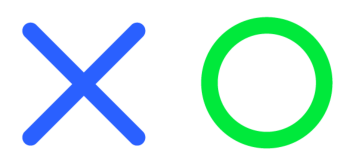

In [9]:
from PIL import Image,ImageChops,ImageFilter
from matplotlib import pyplot as plt

#create a PIL image objects
x=Image.open("x.png")
o=Image.open("o.png")

#find the attributes of image objects
print('size of the image: ',x.size,' colour mode:',x.mode)
print('size of the image: ',o.size,' colour mode:',o.mode)
      
#plot two images one besides other
plt.subplot(121),plt.imshow(x)
plt.axis('off')
plt.subplot(122),plt.imshow(o)
plt.axis('off')     
      
#multiply images
merged=ImageChops.multiply(x,o)

 #adding two images
add=ImageChops.add(x,o)
      
#convert colour mode
grayscale=merged.convert('L')
grayscale

In [13]:
#more attributes

image=merged

print('image size:',image.size,
     '\ncolour mode:',image.mode,
     '\nimagewidth:',image.width,'| also represented by:',image.size[0],
     '\nimageheight:',image.height,'| also represented by:',image.size[1],)

image size: (256, 256) 
colour mode: RGB 
imagewidth: 256 | also represented by: 256 
imageheight: 256 | also represented by: 256


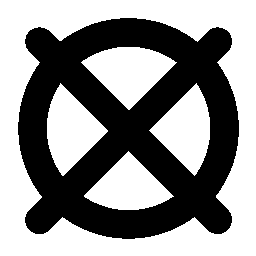

In [16]:
#mapping the pixels of the image so we can use them ascoordinates
pixel=grayscale.load()

#a nested loop to parse through all the pixels in image
for row in range(grayscale.size[0]):
    for column in range(grayscale.size[1]):
        if pixel[row,column]!=(255):
            pixel[row,column]=(0)
            
grayscale            

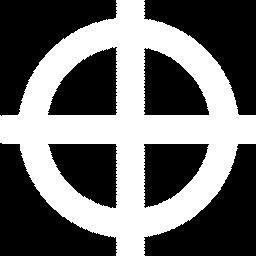

In [21]:
#1.invert image
invert=ImageChops.invert(grayscale)

#2.invert by subtraction
bg=Image.new('L',(256,256),color=(255))#create a new image with a solid white background
subt=ImageChops.subtract(bg,grayscale)#subtract image from background

#3.rotate
rotate=subt.rotate(45)
rotate

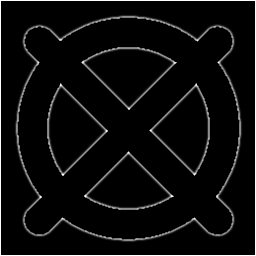

In [23]:
#guassian blur
blur=grayscale.filter(ImageFilter.GaussianBlur(radius=1))

#edge detection
edge=blur.filter(ImageFilter.FIND_EDGES)
edge

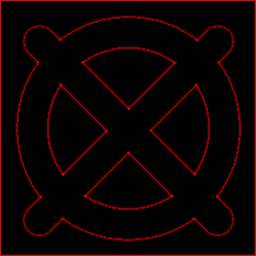

In [25]:
#change edge colour
edge=edge.convert('RGB')
bg_red=Image.new('RGB',(256,256),color=(255,0,0))

filled_edge=ImageChops.darker(bg_red,edge)
filled_edge